### Завдання 1
Повторити дії описані в пункті «Часові ряди і проста лінійна
регресія частина 2» даної лабораторної роботи та порівняти з
результатом попередньої лабораторної роботи.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [6]:
dataset = pd.read_csv("1895-2022.csv")
dataset.columns = ['Date', 'Temperature', 'Anomaly']
dataset.Date = dataset.Date.floordiv(100)
dataset.head(7)

,Date,Temperature,Anomaly
0,1895,61.50,-1.98
1,1896,63.69,0.21
2,1897,62.23,-1.25
3,1898,63.39,-0.09
4,1899,61.16,-2.32
5,1900,63.91,0.43
6,1901,63.14,-0.34


In [7]:
X_train, X_test, y_train, y_test = train_test_split(dataset.Date.values.reshape(-1,1), 
                                                    dataset.Temperature.values, random_state=11)
X_train.shape

(93, 1)

In [8]:
X_test.shape

(31, 1)

In [9]:
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [10]:
linear_regression.coef_

array([0.01996285])

In [11]:
linear_regression.intercept_

24.342796540123388

In [12]:
predicted = linear_regression.predict(X_test)
expected = y_test
for p,e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 63.63, expected: 62.86
predicted: 64.49, expected: 63.68
predicted: 62.75, expected: 61.78
predicted: 63.01, expected: 62.01
predicted: 63.83, expected: 61.38
predicted: 63.41, expected: 62.79
predicted: 62.69, expected: 65.45


In [13]:
predict = (lambda x : linear_regression.coef_ * x + linear_regression.intercept_)
print(predict(2019))

[64.64778769]


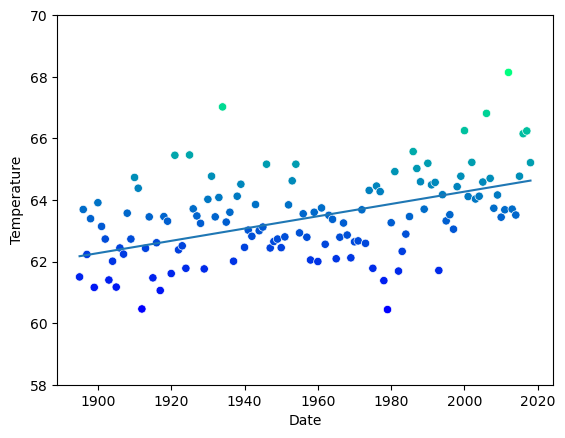

In [14]:
axes = sns.scatterplot(data=dataset, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)
axes.set_ylim(58, 70)
x = np.array([min(dataset.Date.values), max(dataset.Date.values)])
y = predict(x)
line = plt.plot(x,y)

axes.set_xlabel('Date')
axes.set_ylabel('Temperature')

plt.show()

### Завдання 2
Аналогічно з прикладом з лекції 7 згенеруйте набір даних та класифікуйте його використавши класифікатор SVC.

In [15]:
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

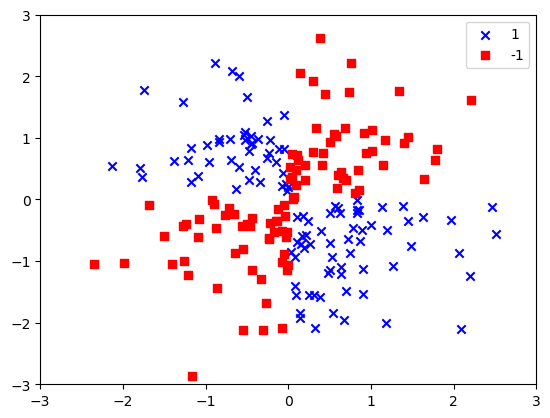

In [16]:
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend(loc='best')
plt.show()

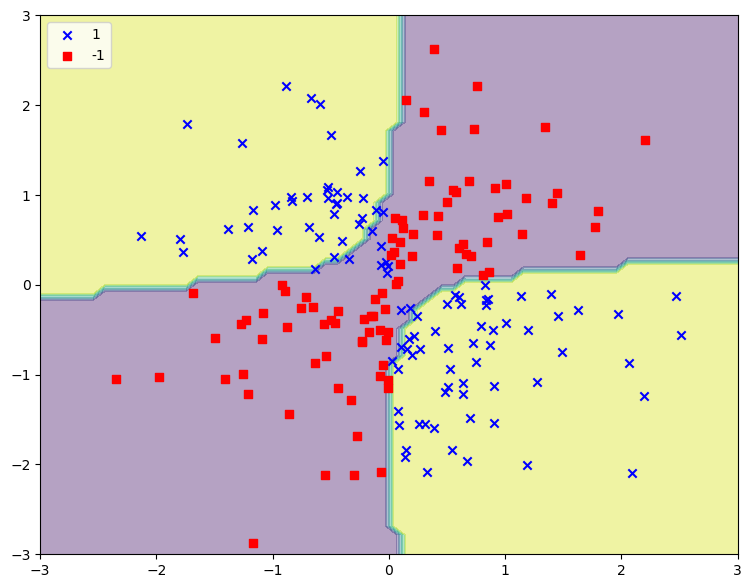

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_xor, y_xor, test_size=0.3, random_state=1)

svm = SVC(kernel='rbf', gamma=0.1, C=10)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

plt.figure(figsize=(9, 7))
x1_min, x1_max = X_xor[:, 0].min() - 1, X_xor[:, 0].max() + 1
x2_min, x2_max = X_xor[:, 1].min() - 1, X_xor[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
Z = svm.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.4)
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1')
plt.legend(loc='upper left')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.show()

### Завдання 3
Порівняти декілька класифікаційних оцінювачів наприклад KNeighborsClassifier, SVC та GaussianNB для вбудованого в scikit-learn одного набору даних

In [20]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer_df = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer_df.data, cancer_df.target, test_size=0.2, random_state=15)

cancer_df = pd.DataFrame(cancer_df.data, columns=cancer_df.feature_names)
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

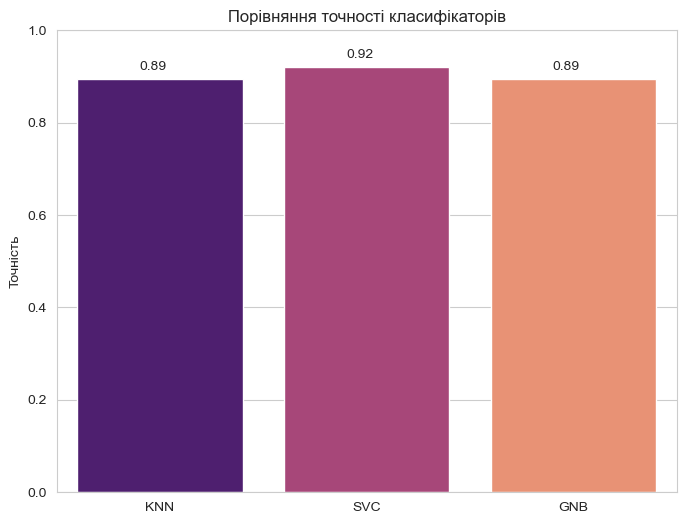

In [30]:
from sklearn.metrics import accuracy_score
from warnings import simplefilter

# Ігноруємо попередження, пов'язані зі змінами поведінки деяких функцій в бібліотеці scikit-learn
simplefilter(action='ignore', category=FutureWarning)

knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)

svc_pred = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_pred)

gnb_pred = gnb.predict(X_test)
gnb_accuracy = accuracy_score(y_test, gnb_pred)

classifiers = ['KNN', 'SVC', 'GNB']
accuracies = [knn_accuracy, svc_accuracy, gnb_accuracy]

sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=classifiers, y=accuracies, palette="magma")

plt.ylim([0, 1])
plt.ylabel("Точність")
plt.title("Порівняння точності класифікаторів")

for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+0.02))

plt.show()